In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import gauss
from random import sample
import math

## Q1.1

In [2]:
N = 240 # number of time points
V = 441 # number of observed variables
x1 = x2 = 21 
def create_TC(AV, IV, DO):
    """ Construct matrix TC """
    
    TC = np.array([])
    IV_val = IV
    
    # onsets arrival vector
    TC = np.zeros(AV)
    
    while len(TC) < N:
        
        # duration of ones
        for i in range(DO):
            if len(TC) >= N:
                break
            TC = np.append(TC, 1)

        # increment vector
        while (len(TC) < IV_val) & (len(TC) < N):
            TC = np.append(TC, 0)
        IV_val += IV
        
        # onsets arrival vector
        for i in range(AV):
            if len(TC) >= N:
                break
            TC = np.append(TC, 0)
            
    TC = (TC - np.mean(TC))/np.std(TC)
    
    return TC

In [3]:
# input values to create TC

TC_1 = create_TC(0, 30, 15)
TC_2 = create_TC(20, 45, 20)
TC_3 = create_TC(0, 60, 25)
TC_4 = create_TC(0, 40, 15)
TC_5 = create_TC(0, 40, 20)
TC_6 = create_TC(0, 40, 25)
TC_full = [TC_1, TC_2, TC_3, TC_4, TC_5, TC_6]

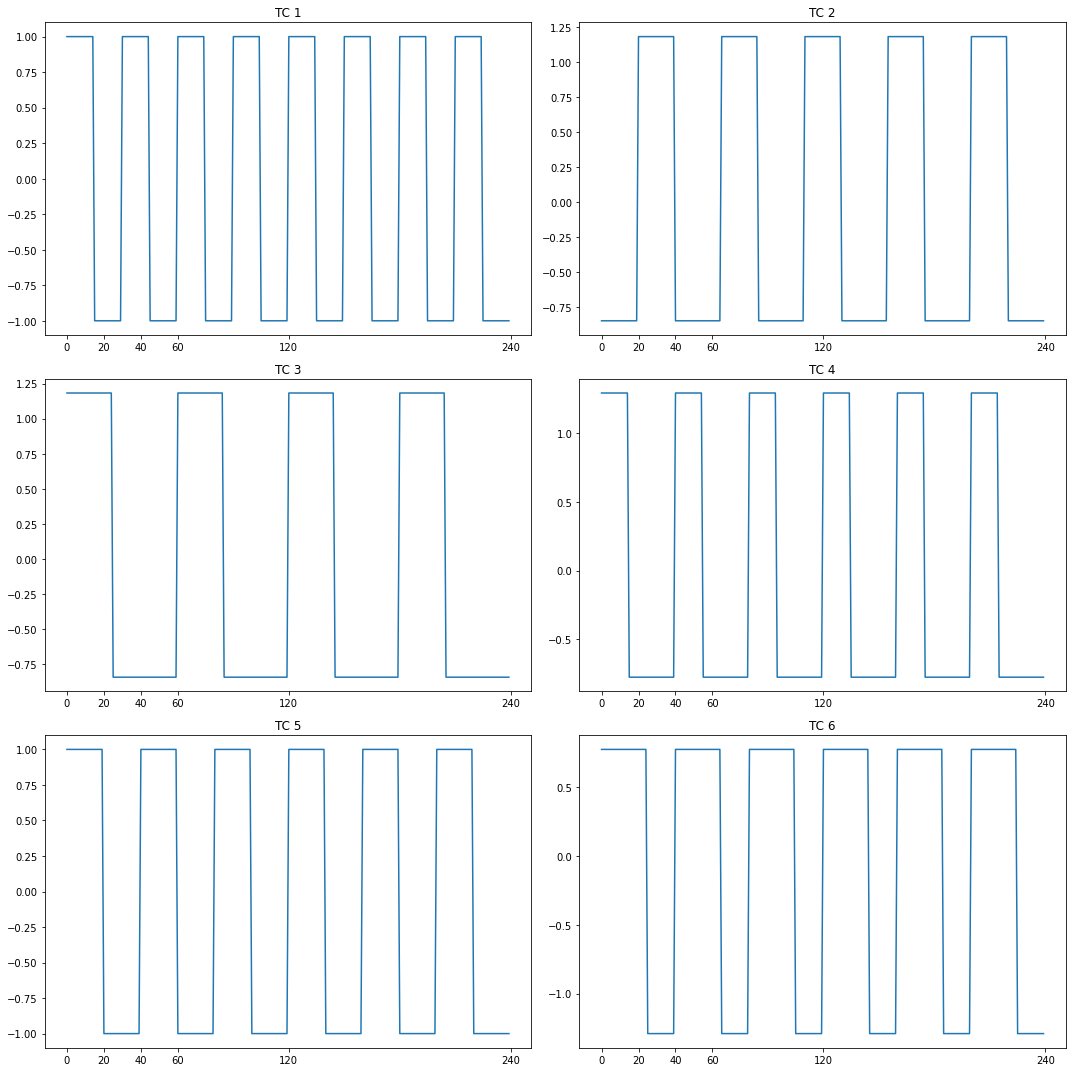

In [4]:
# plotting the graphs of each TC
figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))

plt.setp(axes, xticks=[0, 20, 40, 60, 120, 240])

axes[0, 0].plot(range(240), TC_full[0])
axes[0, 1].plot(range(240), TC_full[1])
axes[1, 0].plot(range(240), TC_full[2])
axes[1, 1].plot(range(240), TC_full[3])
axes[2, 0].plot(range(240), TC_full[4])
axes[2, 1].plot(range(240), TC_full[5]) 


axes[0, 0].set_title("TC 1")
axes[0, 1].set_title("TC 2")
axes[1, 0].set_title("TC 3")
axes[1, 1].set_title("TC 4")
axes[2, 0].set_title("TC 5")
axes[2, 1].set_title("TC 6")



figure.tight_layout()

## Q1.2

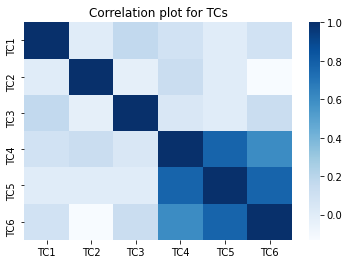

In [5]:
# Generate a correlation plot to check for correlation

TC_labels = list()
for i in range(1, 7):
    label = "TC" + str(i)
    TC_labels.append(label)

# correlation = np.corrcoef(TC_full)
convert_to_df = pd.DataFrame(TC_full)
TC_df = convert_to_df.T
correlation = TC_df.corr()
corr_plot = sns.heatmap(correlation, cmap = 'Blues', xticklabels = TC_labels, yticklabels = TC_labels)
corr_plot.set_title("Correlation plot for TCs")
plt.savefig('../plots/Correlation plot for TCs.png')
plt.show()

## Q1.3

In [6]:
# create a function to construct an array tmpSM
# inputs are the vertical and horizontal directions of the slices
def generate_tmpSM(vertical_begin,vertical_fin, horizontal_begin, horizontal_fin):
  
    # create an inital tmpSM matrix
    tmpSM = np.zeros(441).reshape((21,21))
    
    # add the 1s into the tmpSM matrix according to the input
    tmpSM[vertical_begin:vertical_fin, horizontal_begin:horizontal_fin] = 1
  
    return tmpSM

In [7]:
# generate the 6 vectored SMs

tmpSM_1 = generate_tmpSM(2, 6, 2, 6)
tmpSM_2 = generate_tmpSM(2, 6, 15, 19)
tmpSM_3 = generate_tmpSM(8, 13, 2, 6)
tmpSM_4 = generate_tmpSM(8, 13, 15, 19)
tmpSM_5 = generate_tmpSM(15, 19, 2, 6)
tmpSM_6 = generate_tmpSM(15, 19, 15, 19)

tmpSM = np.array([tmpSM_1, tmpSM_2, tmpSM_3, tmpSM_4, tmpSM_5, tmpSM_6])

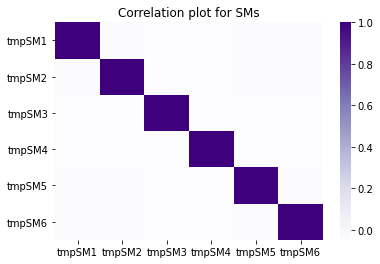

In [8]:
# check if the 6 vectored SMs are independent

tmpSM_labels = list()
for i in range(1, 7):
    label = "tmpSM" + str(i)
    tmpSM_labels.append(label)

SM = np.reshape(tmpSM, (6, 441))
convert_to_df = pd.DataFrame(SM)
tmpSM_df = convert_to_df.T
correlation = tmpSM_df.corr()
corr_plot = sns.heatmap(correlation, cmap = 'Purples', xticklabels = tmpSM_labels, yticklabels = tmpSM_labels)
corr_plot.set_title("Correlation plot for SMs")
plt.savefig('../plots/Correlation plot for SMs.png')
plt.show()

## Q1.4

In [9]:
temp_val = [0 for i in range(1440)]
for i in range(1440):
    temp_val[i] = gauss(0.0, math.sqrt(0.25))
noise_temporal = np.array(temp_val)
noise_temporal = noise_temporal.reshape((240, 6))


spa_val = [0 for i in range(2646)]
for i in range(2646):
    spa_val[i] = gauss(0.0, math.sqrt(0.015))
noise_spatial = np.array(spa_val)
noise_spatial = noise_spatial.reshape((6, 441))

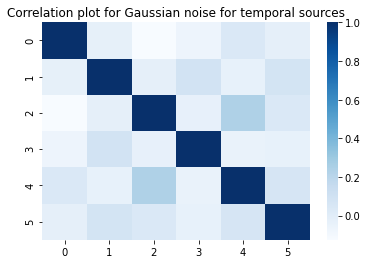

In [10]:
# check if the 6x6 CM for the temporal noise are correlated across the sources
noise_temporal_df = pd.DataFrame(noise_temporal)
temporal_corr = noise_temporal_df.corr()
temporal_corr_plot = sns.heatmap(temporal_corr, cmap='Blues')
temporal_corr_plot.set_title("Correlation plot for Gaussian noise for temporal sources")
plt.savefig("../plots/Correlation plot for Gaussian noise for temporal sources.png")

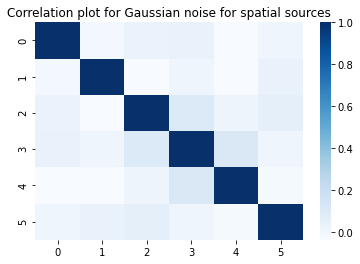

In [11]:
# check if the 6x6 CM for the spatial noise are correlated across the sources
noise_spatial_df = pd.DataFrame(noise_spatial)
noise_spatial_df = noise_spatial_df.T
spatial_corr = noise_spatial_df.corr()
spatial_corr_plot = sns.heatmap(spatial_corr, cmap='Blues')
spatial_corr_plot.set_title("Correlation plot for Gaussian noise for spatial sources")
plt.savefig("../plots/Correlation plot for Gaussian noise for spatial sources.png")


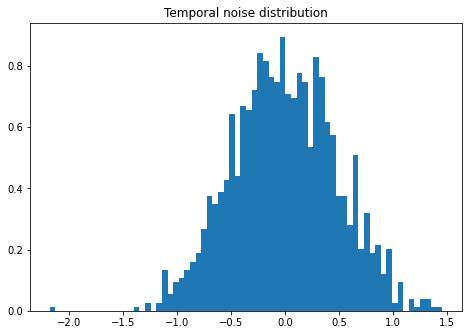

In [12]:
# Histogram for the temporal noise distribution

fig = plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.hist(noise_temporal.flatten(), bins = 70, density = True, stacked = True)
axis.set_title("Temporal noise distribution")
plt.savefig("../plots/Temporal noise distribution")


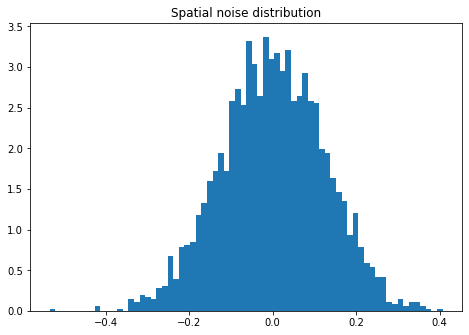

In [13]:
# Histogram for the spatial noise distribution
fig = plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.hist(noise_spatial.flatten(), bins = 70, density = True, stacked = True)
axis.set_title("Spatial noise distribution")
plt.savefig("../plots/Spatial noise distribution")

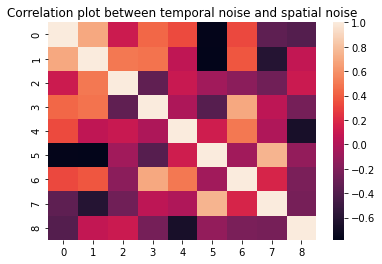

In [15]:
# Check whether the normal distributions fulfills the mean and variance of 1.96*sigma
# visualising the correlation between the temporal noise and spatial noise
temp_spa = np.dot(noise_temporal, noise_spatial)
temp_spa_df = pd.DataFrame(temp_spa)
sample_TtTs_df = temp_spa_df[[0, 1, 2, 3, 4, 5, 6, 7, 8]]
temp_spa_corr = sample_TtTs_df.corr()
temp_spa_corr_plot = sns.heatmap(temp_spa_corr)
temp_spa_corr_plot.set_title("Correlation plot between temporal noise and spatial noise")
plt.savefig("../plots/Correlation plot between temporal noise and spatial noise.png")

## Q1.5

<AxesSubplot:>

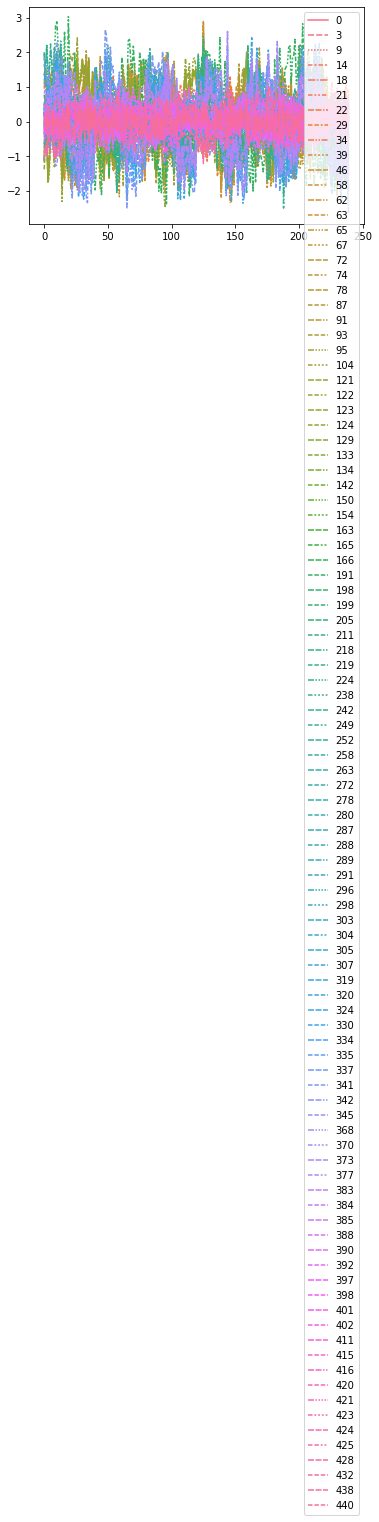

In [16]:
X = np.dot((TC_df + noise_temporal), (SM + noise_spatial))

X_df = pd.DataFrame(X)
randomly_selected = sample(list(range(0,441)), 100)
sample = X_df[randomly_selected]
sns.lineplot(data = sample)


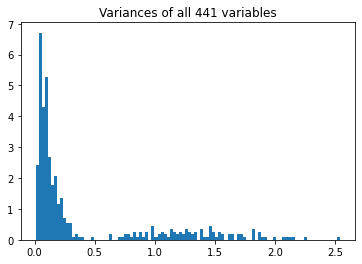

In [18]:
# Plot the variances of all 441 variables 

variances = np.var(X_df, axis = 0)
plt.hist(variances, bins = 100, density = True, stacked = True)
plt.title("Variances of all 441 variables")
plt.savefig("../plots/Variances of all 441 variables")
plt.show()

In [19]:
# Standardize X 
X = X - np.mean(X)
X = X / np.std(X)
X_df = X_df - np.mean(X_df)
X_df = X_df / np.std(X_df)

## Q2.1

In [20]:
DT = np.transpose(TC_df)
DTD = np.dot(DT, TC_df)
DTD_inv = np.linalg.inv(DTD)
DTX = np.dot(DT, X)
A_lsr = np.dot(DTD_inv, DTX)
D_LSR = np.dot(X, np.transpose(A_lsr))


A_LSR = A_lsr.reshape(6, 21, 21)

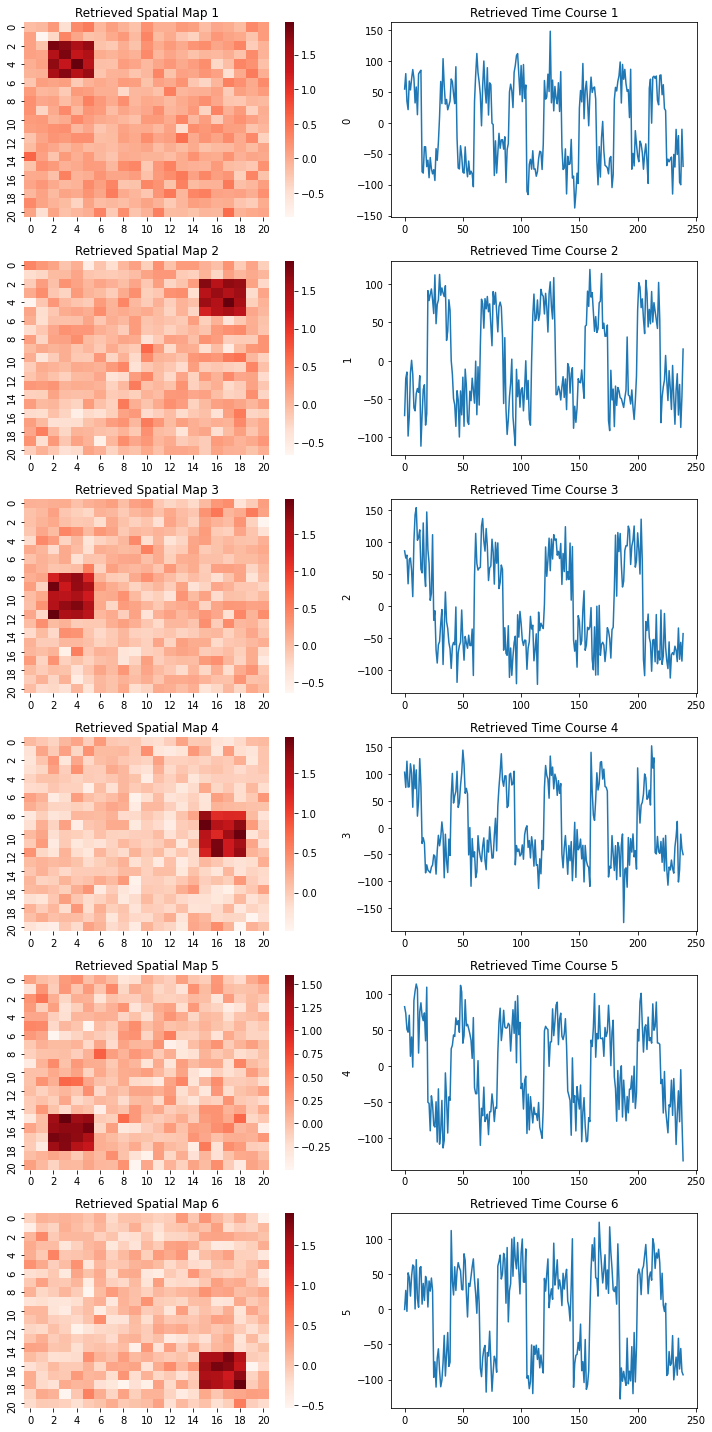

In [22]:
figure, axes = plt.subplots(6, 2, figsize=(10,20))

DLSR_df = pd.DataFrame(D_LSR)
for c in range(0, len(A_LSR)):
    sns.heatmap(data = A_LSR[c], cmap="Reds", ax = axes[c][0])
    axes[c, 0].set_title("Retrieved Spatial Map " + str(c + 1))
    sns.lineplot(data = DLSR_df[c], ax = axes[c][1])
    axes[c, 1].set_title("Retrieved Time Course " + str(c + 1))
#     axes[c,0].savefig("../plots/Retrieved Spatial Map " + str(c + 1))
plt.tight_layout()
plt.show()

/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


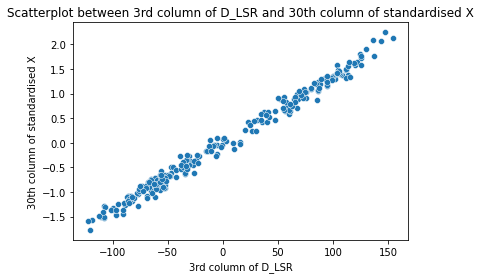

In [33]:
sns.scatterplot(DLSR_df[2], X_df[9*21 + 2])
plt.xlabel("3rd column of D_LSR")
plt.ylabel("30th column of standardised X")
plt.title("Scatterplot between 3rd column of D_LSR and 30th column of standardised X")
plt.savefig("../plots/Scatterplot between 3rd column of D_LSR and 30th column of standardised X")
plt.show()

/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


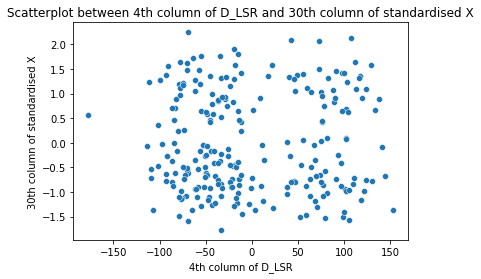

In [32]:
sns.scatterplot(DLSR_df[3], X_df[9*21 + 2])
plt.xlabel("4th column of D_LSR")
plt.ylabel("30th column of standardised X")
plt.title("Scatterplot between 4th column of D_LSR and 30th column of standardised X")
plt.savefig("../plots/Scatterplot between 4th column of D_LSR and 30th column of standardised X")
plt.show()

## Q2.2

In [27]:
lamda_tilde = 0.6 * V
I = np.identity(6)
eqn = DTD + np.dot(lamda_tilde, I)
eqn_inv = np.linalg.inv(eqn)
A_RR = np.dot(eqn_inv, DTX)
D_RR = np.dot(X_df, np.transpose(A_RR))


In [28]:
from scipy.stats import pearsonr

C_TLSR = list()
C_TRR = list()
DRR_df = pd.DataFrame(D_RR)

for i in range(6):
        corr, _ = pearsonr(TC_df[i], DLSR_df[i])
        C_TLSR.append(corr)
        
        corr2, _ = pearsonr(TC_df[i], DRR_df[i])
        C_TRR.append(corr2)
        
sum_CTLSR = sum(C_TLSR)
sum_CTRR = sum(C_TRR)
print("Sum of CTLSR: ", sum_CTLSR)
print("Sum of CTRR: ", sum_CTRR)
print("Sum of C_TRR greater than the sum of C_TLSR: ", sum_CTRR > sum_CTLSR)



Sum of CTLSR:  5.414182296630854
Sum of CTRR:  5.447482014906608
Sum of C_TRR greater than the sum of C_TLSR:  True


In [36]:
lambda_val = 1000 * V
eqn2 = DTD + np.dot(lambda_val, I)
eqn2_inv = np.linalg.inv(eqn2)
ARR_2 = np.dot(eqn2_inv, DTX)

ARR_2_df = pd.DataFrame(ARR_2)
ARR_2_df = ARR_2_df.T

ALSR_df = pd.DataFrame(A_lsr)
ALSR_df = ALSR_df.T

# sns.scatterplot(ARR_2_df[0], ALSR_df[0])
# plt.title('A_RR vs. A_LSR')
# plt.xlabel('A_RR')
# plt.ylabel('A_LSR')
# plt.savefig("../plots/A_RR vs. A_LSR")

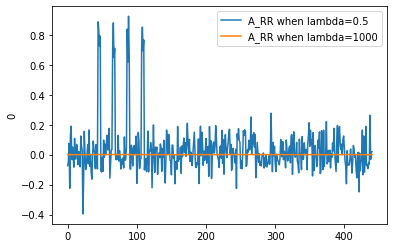

In [38]:
ARR_df = pd.DataFrame(np.transpose(A_RR))
sns.lineplot(data=ARR_df[0], label='A_RR when lambda=0.5')
sns.lineplot(data=ARR_2_df[0], label='A_RR when lambda=1000')
plt.savefig("../plots/A_RR vs. A_LSR.png")

## Q2.3

In [39]:
# create an array of rho values in the range of 0 to 1 with 0.05 increments

start = 0
n = 1.05
interval = 0.05
rho_list = np.arange(start, n , interval)


In [40]:
# Lasso Regression (adapted from the R-code given in the assignment spec)

X_array = X_df.to_numpy()
def lasso_reg(TC, X, rho):
    
    nsrcs = 6
    step = 1 / ((np.linalg.norm(TC @ np.transpose(TC))*1.1))
    thr = rho * 240 * step
    Ao = np.zeros((nsrcs,1))
    A = np.zeros((nsrcs,1))
    Alr = np.zeros((nsrcs,x1*x2))
    TC = TC.to_numpy()
    
    for k in range(x1*x2):
        A = Ao + step * np.dot((np.transpose(TC)), (X[:,k].reshape(240,1) - (TC @ Ao)))
        A = (1/(1+thr)) * (np.sign(A) * np.max([np.zeros(nsrcs), np.transpose(np.abs(A) - thr)[0]], axis = 0).reshape(6,1))
        for i in range(10):
            Ao = A
            A = Ao + step * np.dot((np.transpose(TC)), (X[:,k].reshape(240,1) - (TC @ Ao)))
            A = (1/(1+thr)) * (np.sign(A) * np.max([np.zeros(nsrcs), np.transpose(np.abs(A) - thr)[0]], axis = 0).reshape(6,1))
        Alr[:,k] = A.reshape(1,6)[0]
        
    return Alr

In [41]:
def MSE(X, D, A):
    return np.sum(np.sum(np.square(X - (D @ A))))/(N*V)

MSEs = np.zeros((10, 21))

# Iterate over seed and rho combinations for 10 realisations using each rho.
for i in range(10):
    for j, rho in enumerate(rho_list):
        np.random.seed(i)
        Tt_new = np.array([gauss(0.0, math.sqrt(0.25)) for i in range(240 * 6)])
        Tt_new = Tt_new.reshape((240, 6))
        Ts_new = np.array([gauss(0.0, math.sqrt(0.015)) for i in range(6 * 441)])
        Ts_new = Ts_new.reshape((6, 441)) 
        
        X_lasso = np.add(TC_df, Tt_new) @ np.add(SM, Ts_new)
        X_lasso = (X_lasso - np.mean(X_lasso, axis=0)) / np.std(X_lasso, axis=0)
        X_lasso = X_lasso.to_numpy()

        
        
        A_lasso = lasso_reg(TC_df, X_lasso, rho)
        D_lasso = np.dot(X_lasso, np.transpose(A_lasso))
        
        MSEs[i, j] = MSE(X_lasso, D_lasso, A_lasso)
        

In [42]:
avg_MSEs = np.mean(MSEs, axis = 0)

In [43]:
avg_MSEs

array([2.87074035e+03, 1.61899506e+03, 8.99805281e+02, 4.73487797e+02,
       2.63604696e+02, 1.37165625e+02, 6.51132489e+01, 3.04006815e+01,
       1.34257193e+01, 4.82918009e+00, 1.70654085e+00, 6.35233921e-01,
       5.22143896e-01, 6.73133789e-01, 8.30923685e-01, 9.31560665e-01,
       9.82449751e-01, 9.98450120e-01, 9.99998592e-01, 1.00000000e+00,
       1.00000000e+00])

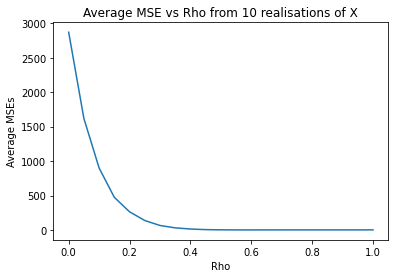

Best rho value is 0.600 with an average MSE of 0.522


In [44]:
# Plot average MSEs vs rho

plt.plot(rho_list, avg_MSEs)
plt.xlabel("Rho")
plt.ylabel("Average MSEs")
plt.title("Average MSE vs Rho from 10 realisations of X")
plt.savefig("../plots/Average MSE vs Rho from 10 realisations of X.png")
plt.show()
print(f"Best rho value is {rho_list[np.argmin(avg_MSEs)]:.3f} with an average MSE of {min(avg_MSEs):.3f}")

## Q2.4

In [53]:
Alr = lasso_reg(TC_df, X, 0.6)
Dlr = np.dot(X, Alr.T)

In [54]:
Dlr_df = pd.DataFrame(Dlr)

In [55]:
Ctlr = list()
Ctrr = list()
Cslr = list()
Csrr = list()

for i in range(6):
    Ctlr.append(np.abs((np.corrcoef(TC_df[i], Dlr_df[i]))[0, 1]))
    Ctrr.append(np.abs((np.corrcoef(TC_df[i], DRR_df[i]))[0, 1]))
    Cslr.append(np.abs((np.corrcoef(SM[i], Alr[i]))[0, 1]))
    Csrr.append(np.abs((np.corrcoef(SM[i], A_RR[i]))[0, 1]))

print(f"Sum of ctlr coefficients: {sum(Ctlr)}")
print(f"Sum of ctrr coefficients: {sum(Ctrr)}")
print(f"Sum of cslr coefficients: {sum(Cslr)}")
print(f"Sum of csrr coefficients: {sum(Csrr)}")
print("Sum of C_TLR greater than sum of C_TRR: ", sum(Ctrr) < sum(Ctlr))
print("Sum of C_SLR greater than sum of C_SRR: ", sum(Csrr) < sum(Cslr))

Sum of ctlr coefficients: 5.406240331235688
Sum of ctrr coefficients: 5.385006209571717
Sum of cslr coefficients: 5.699439547267593
Sum of csrr coefficients: 4.557171625532046
Sum of C_TLR greater than sum of C_TRR:  True
Sum of C_SLR greater than sum of C_SRR:  True


In [ ]:
figure, axis = plt.subplots(6, 4, figsize = (50, 50), gridspec_kw=dict(width_ratios = [7, 7, 13, 13]))
# figure, axis = plt.subplots(6, 2, figsize=(10,20))
for i in range(6):
#     sns.heatmap(arr[i], cmap = "Blues", vmin = 0, vmax = 1, ax = axis[i][0])
#     sns.heatmap(arr[i], cmap = "Blues", ax = axis[i][0])
    sns.heatmap(np.abs(Alr.reshape(6, 21, 21).swapaxes(1,2)[i]), cmap = "Reds", vmin = 0, vmax = 1, ax = axis[i][0])
    sns.heatmap(np.abs(A_RR.reshape(6, 21, 21).swapaxes(1,2)[i]), cmap = "Reds", vmin = 0, vmax = 1, ax = axis[i][1])
    axis[i, 0].set_title(f"Alr {i + 1}" + str(i + 1))
#     sns.heatmap(np.abs(Arr.reshape(6, 21, 21).swapaxes(1,2)[i]), cmap = "Greens", vmin = 0, vmax = 1, ax = axis[i][1])
    axis[i, 1].set_title(f"Arr {i + 1}" + str(i + 1))
    axis[i][2].plot(Dlr_df.iloc[:, i])
    axis[i][2].set_title(f"Dlr {i + 1}")
    axis[i][2].set_ylim([-50, 50])
    axis[i][3].plot(DRR_df.iloc[:, i])
    axis[i][3].set_title(f"Drr {i + 1}")
    axis[i][3].set_ylim([-50, 50])
    

## Q2.5

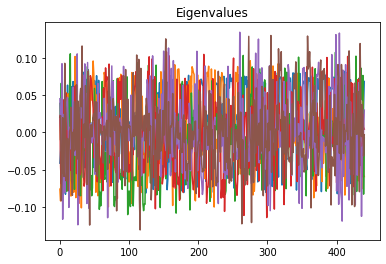

In [67]:
for i in range(6):
    u, s, v = np.linalg.svd(X_df)
    plt.plot(v[i])
plt.title("Eigenvalues")
plt.savefig("../plots/Eigenvalues.png")

In [68]:
min_val = []
for i in range(6):
    u, s, v = np.linalg.svd(X_df)
    min_val.append(np.min(v[i]))
    smallest_val = np.min(min_val)
    min_index = min_val.index(smallest_val)
print("PC", {min_index + 1}, "has the smallest eigenvalue")
print("Smallest eigenvalue: ", smallest_val)


PC {6} has the smallest eigenvalue
Smallest eigenvalue:  -0.13082647386250815


In [69]:
u, s, v = np.linalg.svd(X_df, 6)
U = u @ TC_df

In [70]:
U.shape

(240, 6)

In [71]:
def lasso_reg(TC, X, rho):
    
    nsrcs = 6
    step = 1 / ((np.linalg.norm(TC @ np.transpose(TC))*1.1))
    thr = rho * N * step
    Ao = np.zeros((nsrcs,1))
    A = np.zeros((nsrcs,1))
    Alr = np.zeros((nsrcs,x1*x2))
    
    for k in range(x1*x2):
        A = Ao + step * np.dot((np.transpose(TC)), (X[:,k].reshape(240,1) - (TC @ Ao)))
        A = (1/(1+thr)) * (np.sign(A) * np.max([np.zeros(nsrcs), np.transpose(np.abs(A) - thr)[0]], axis = 0).reshape(6,1))
        for i in range(10):
            Ao = A
            A = Ao + step * np.dot((np.transpose(TC)), (X[:,k].reshape(240,1) - (TC @ Ao)))
            A = (1/(1+thr)) * (np.sign(A) * np.max([np.zeros(nsrcs), np.transpose(np.abs(A) - thr)[0]], axis = 0).reshape(6,1))
        Alr[:,k] = A.reshape(1,6)[0]

    return Alr

In [72]:
Apcr = lasso_reg(U, X, 0.001)

In [73]:
Dpcr = X @ Apcr.T

In [ ]:
Dpcr_df = pd.DataFrame(Dpcr)
# Dpcr_df = Dpcr_df.rename(columns = {'V1':'0', 'V2':'1', 'V3':'2', 'V4':'3', 'V5':'4', 'V6':'5'})

A_pcr = []
apcr = np.array(Apcr)

for row in range(6):
    A_pcr.append(apcr[row].reshape((x1, x2)))

In [ ]:
fig, axes = plt.subplots(6, 2, figsize=(10,20))

for i in range(6):

    sns.lineplot(data= Dpcr_df.iloc[:,i], ax = axes[i][0])
    axes[i][0].set(xlabel=f"Dpcr {i+1}")
    
    sns.heatmap(data = A_pcr[i], ax = axes[i][1])
    axes[i][1].set(xlabel=f"Apcr {i+1}")
#     plt.savefig('../MAST30034-Assignment1/plots/Q2_5-' + str(i+1) + '.png')
plt.tight_layout()
plt.show()